### 整合几部分代码的汇总

#### 隐藏代码片段

In [1]:
from IPython.display import HTML
from IPython.display import Image
import sys  
sys.path.append('.')  
"""
https://www.cnblogs.com/shadow1/p/11202808.html
"""

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')




#### 导入python数据和可视化包

In [2]:
"""
pandas numpy : data_process
matplotlib seaborn : data visualization
warning: avoid warning from packages
"""
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
# data process
import pandas as pd
import  numpy as np
# data visualization
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# set option for visilazition
color = sns.color_palette()
sns.set_style('darkgrid')
#sns.set(style='white', context='notebook', palette='deep')
"""
# avoid warning ignore annoying warning (from sklearn and seaborn and other packages xgboost and lightgbm)
# we can use !ls or !pip install package_name to ahcieve some magic command line 
"""
# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
#or sns.set(style='white', context='notebook', palette='deep') 
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')


Data Manipulation, Mathematical Computation and Visualisation packages imported!


#### 导入统计相关的工具

In [3]:
"""
function:Statistical packages used for transformations
stats: staticstic function in scipy 
skew: for partial norm distributions  skewed coefficient.
boxcox1p: transform data or feature to normal distribution 
https://blog.csdn.net/u012735708/article/details/84755595,determine the lambda估算的值)
pearsonr: 皮尔逊系数
"""
from scipy import stats 
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

Statistical packages imported!


#### 导入回归相关的算法

In [4]:

"""
ElasticNet:弹性网络
Lasso: 奥卡姆剃刀回归，正则化
BayesianRidge: 贝叶斯回归
常见的线性回归模型:http://blog.sina.com.cn/s/blog_62970c250102xfgb.html，LassoLarsIC这个模型不熟悉
ensemble 方法: 随即森林回归，GBDT回归，xgboost回归，lightGBM 回归
numpy.dtype size changed, may indicate binary incompatibility 问题解决方案: numpy 版本过高，调低numpy版本
"""
# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
print('Algorithm packages imported!')    


Algorithm packages imported!


#### 导入数据预处理相关的方法

In [5]:

"""
make_pipeline: construct pipeline for processing data
RobustScaler: 针对离群点的RobustScaler有些时候，数据集中存在离群点，用Z-Score进行标准化，但是结果不理想，
因为离群点在标准化后丧失了利群特性。RobustScaler针对离群点做标准化处理，该方法对数据中心化的数据的缩放健壮性有更强的参数控制能力。
StandScaler(Z-Score): 新数据=（原数据-均值）/标准差
归一化Max-Min:新数据=（原数据-最小值）/（最大值-最小值）
"""
# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#     from sklearn.feature_selection import SelectFromModel
#     from sklearn.feature_selection import SelectKBest
#     from sklearn.feature_selection import chi2
#     模型选择的模块用的比较少
print('Pipeline and preprocessing packages imported!')

Pipeline and preprocessing packages imported!


#### 导入模型调参相关的包

In [6]:

# Model select packages used for sampling dataset and optimising parameters
"""
KFold: 它将原始数据分成K组(K-Fold)，将每个子集数据分别做一次验证集，其余的K-1组子集数据作为训练集，这样会得到K个模型。
cross_val_score: 交叉验证的评估值
train_test_split: 数据切割成训练集和测试集（验证集）
GridSearchCV:网格搜索参数，进行模型搜索
ShuffleSplit： train_test_split的参数中shuffle参数设定为True
"""
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

Model selection packages imported!


In [7]:
from subprocess import check_output
print(check_output(['ls']).decode("utf8"))  # check the files available in the directory
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #设定pandas数字格式，小数点后3位

1-house-prices-solution-top-1.ipynb
Stacked Regressions _ Top 4% on LeaderBoard.ipynb
__pycache__
concat_kaggle_house_price.ipynb
data_description.txt
data_description.zip
final_submission.csv
input
kaggle house price.ipynb
laod_Algorithms.py
stacking-house-prices-walkthrough-to-top-5.ipynb
submission.csv



#### 读取数据

In [8]:
def load_data():
    #Now let's import and put the train and test datasets in  pandas dataframe

    train = pd.read_csv('input/train.csv')
    test = pd.read_csv('input/test.csv')
    return train, test

In [9]:
train,test = load_data()

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
train_ID = train['Id']
test_ID = test['Id']

#去掉Id字段，因为这个特征没意义
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


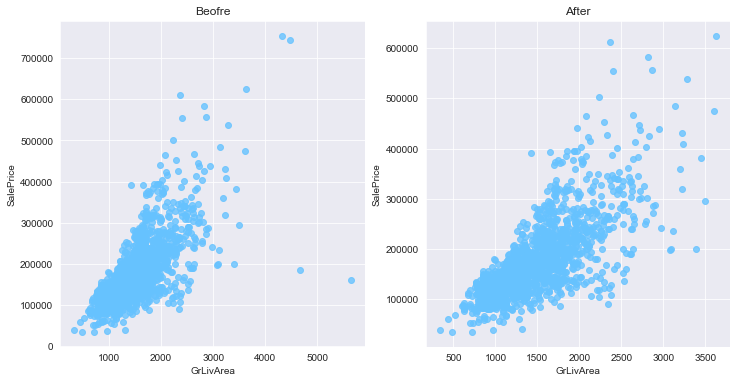

In [13]:
plt.subplots(figsize=(12,6))  # 设定画布大小
plt.subplot(1,2,1)  # 图片的排列方式1行2列的第一张图
g= sns.regplot(x=train['GrLivArea'],y= train['SalePrice'],fit_reg=False).set_title('Beofre')  
plt.subplot(1,2,2)  # 图片的排列方式1行2列的第二张图
train= train.drop(train[train['GrLivArea']>4000].index)  # 去掉面积大于4000的样本，axis=0 默认人参数
g=sns.regplot(x=train['GrLivArea'],y=train['SalePrice'],fit_reg=False).set_title('After')  

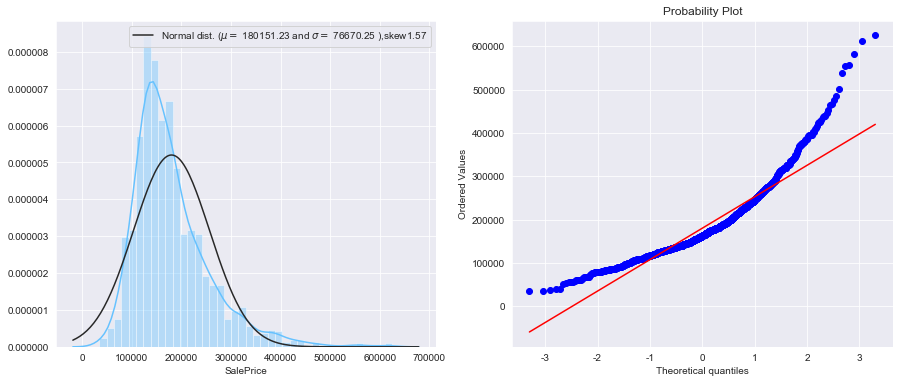

In [14]:
"""
P-P图是根据变量的累积概率对应于所指定的理论分布累积概率绘制的散点图，用于直观地检测样本数据是否符合某一概率分布。
如果被检验的数据符合所指定的分布，则代表样本数据的点应当基本在代表理论分布的对角线上。
"""

plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
g=sns.distplot(train['SalePrice'],fit=norm)

mu, sigma, = norm.fit(train['SalePrice'])  # 均值，标准差
skew_co  =train['SalePrice'].skew() # 偏态系数
g.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ),skew{:.2f}'.format(mu, sigma,skew_co)],
            loc='best')
plt.subplot(1,2,2)
g = stats.probplot(train['SalePrice'], plot=plt)


- The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.
- 目标数据右偏态，大部分的统计原理和参数检验都是基于正态分布推得，因此可以将目标变量转化标准正态分布


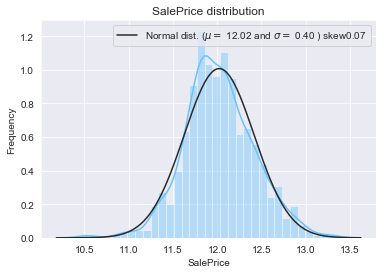

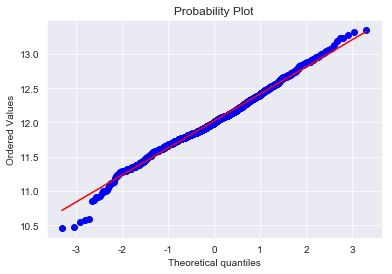

In [15]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
mu, sigma, = norm.fit(train['SalePrice'])  # 均值，标准差
skew_co  =train['SalePrice'].skew() # 偏态系数

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ) skew{:.2f}'.format(mu, sigma,skew_co)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

- The skew seems now corrected and the data appears more normally distributed.
- 通过P_P图可以看出，经过log1p转化之后的目标变量近似正态分布

### 特征工程

In [16]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2915, 79)


#### 缺失值

In [17]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.726
MiscFeature,96.398
Alley,93.208
Fence,80.446
FireplaceQu,48.714
LotFrontage,16.672
GarageQual,5.455
GarageCond,5.455
GarageFinish,5.455
GarageYrBlt,5.455


Text(0.5, 1.0, 'Percent missing data by feature')

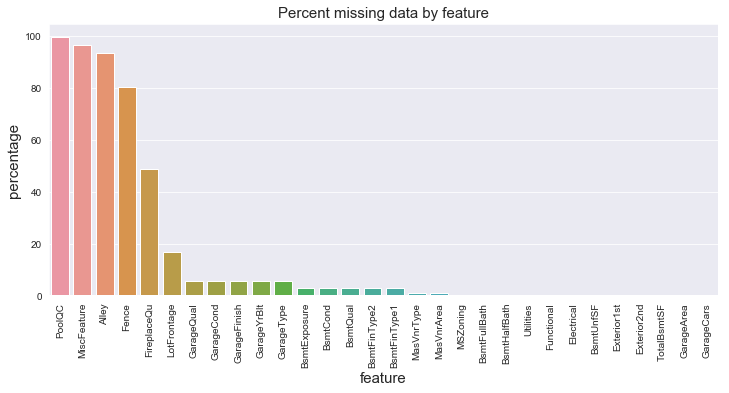

In [18]:
plt.subplots(figsize=(12,5)) # 设定画布大小
sns.barplot(x=all_data_na.index,y=all_data_na)
plt.xticks(rotation='90')  # 设定x轴的标签
plt.ylabel('percentage',fontsize=15)
plt.xlabel('feature',fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [19]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
# 字段的说明中如果没有游泳池，因此用None填充

In [20]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [21]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


In [22]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    

In [23]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [24]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [25]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [26]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [27]:
all_data = all_data.drop(['Utilities'], axis=1)

In [28]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")


In [29]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [30]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [31]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


#### 类别特征处理-label转化

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2915, 78)


In [33]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#### box-cox转换

In [41]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
MiscVal,21.932
PoolArea,18.702
LotArea,13.124
LowQualFinSF,12.080
3SsnPorch,11.368
LandSlope,4.971
KitchenAbvGr,4.299
BsmtFinSF2,4.143
EnclosedPorch,4.001
ScreenPorch,3.944


In [42]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} highly skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 highly skewed numerical features to Box Cox transform


#### one-hot categoy 特征

In [43]:

all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2915, 220)


#### 数据相关性

In [36]:
def get_data_coorelation(data):
    corr = data.corr()
    plt.subplots(figsize=(30,30))
    cmap = sns.diverging_palette(150, 250, as_cmap=True) # 以后可以固定下来这样的格式，尤其是对于数据的相关系数
    sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True)

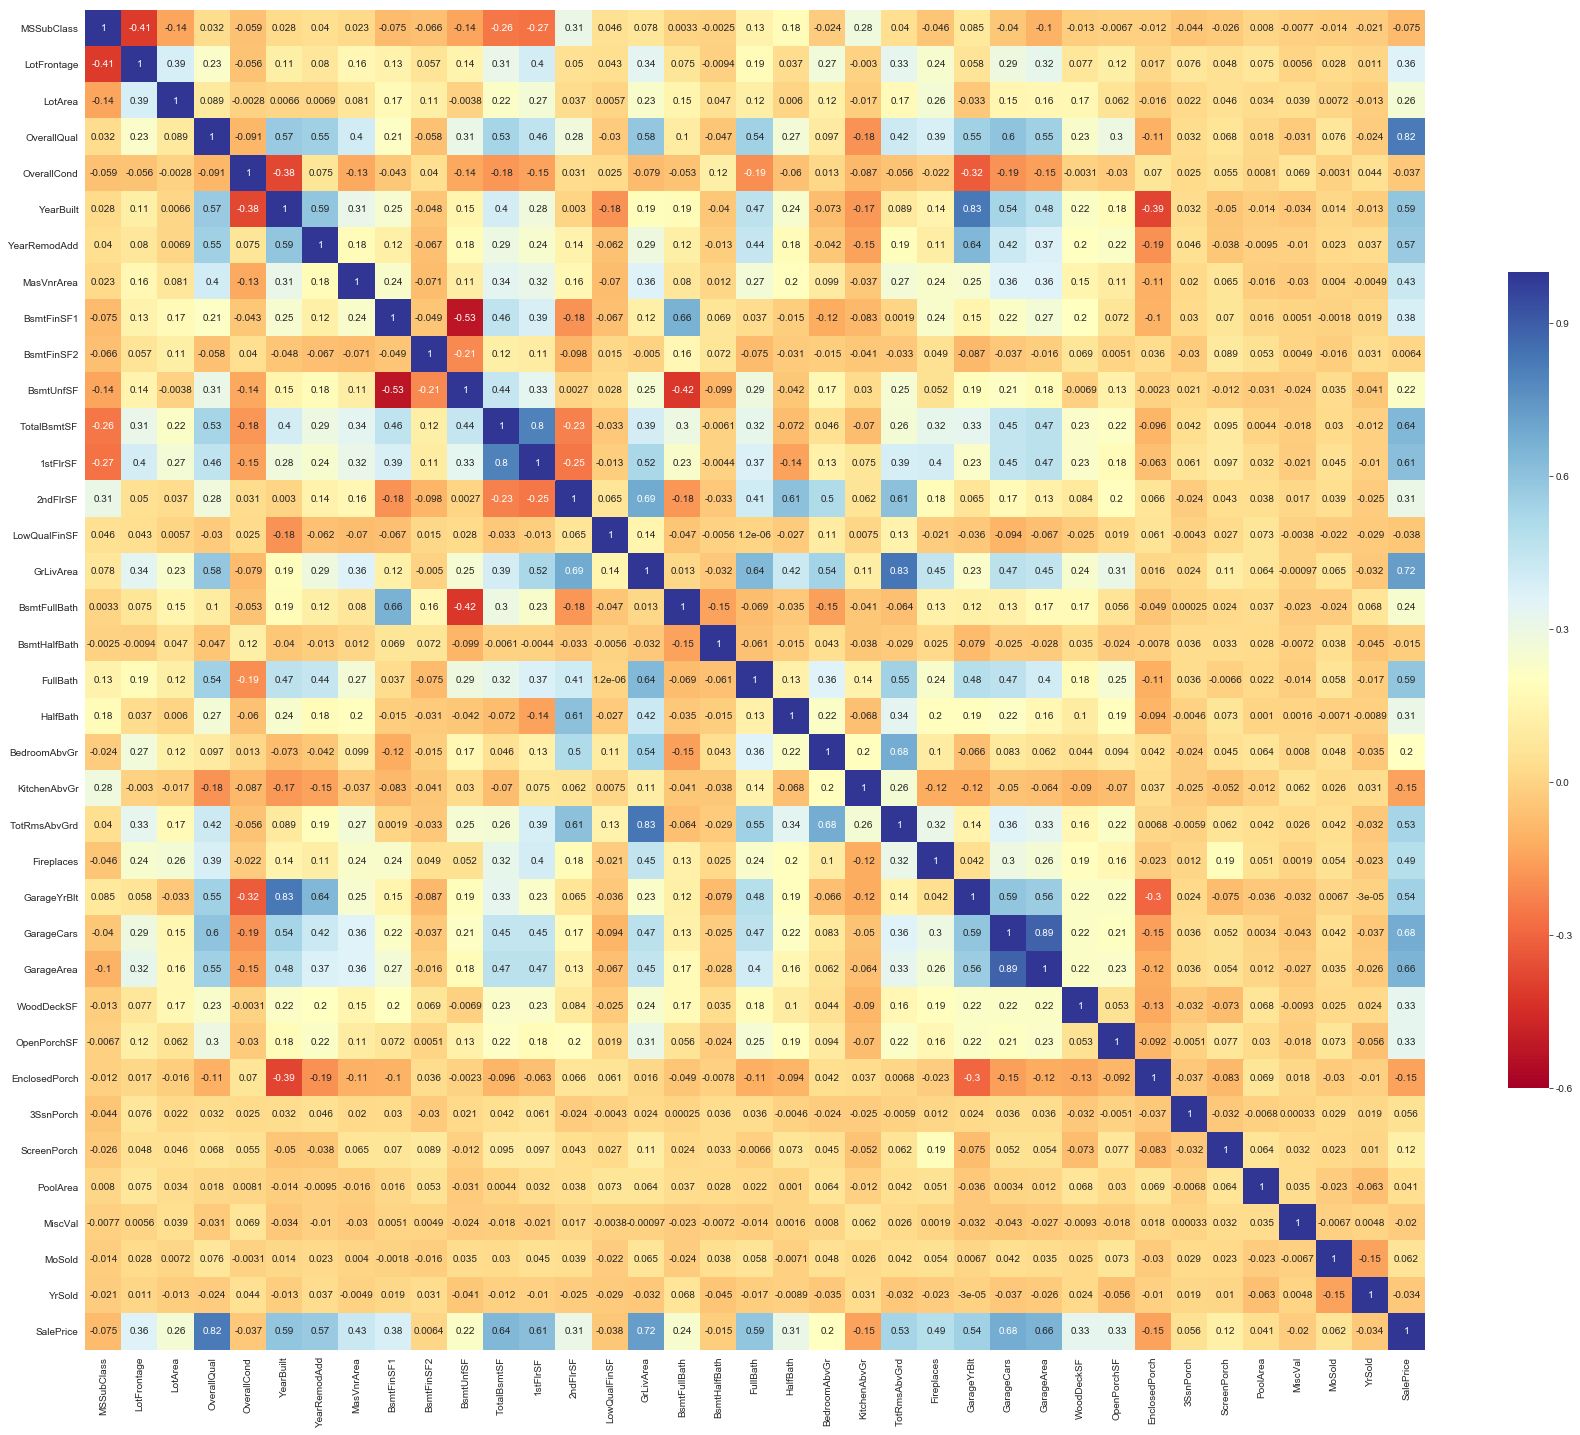

In [37]:
get_data_coorelation(train)

In [44]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### 模型部门

In [45]:
from sklearn.metrics import mean_squared_error

In [ ]:
for alg in models:
    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index,'Name'] = model_name
    before_model_compare.loc[row_index,'Parameters'] = str(alg.get_params())
    alg.fit(X_train,Y_train)
    # for cross_validation  but the results are negative,we need to convert it to postive,均方误差
    training_results = np.sqrt((-cross_val_score(alg,X_train,Y_train,cv=shuff,scoring='neg_mean_squared_error')).mean())
    test_results = np.sqrt(((Y_test-alg.predict(X_test))**2).mean())
    before_model_compare.loc[row_index,"Train mean_squared_error"] = training_results*100
    before_model_compare.loc[row_index,'Test mean_squared_error'] = test_results*100
    row_index+=1
    print(row_index,model_name,"trained>>>>")

In [53]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#### 基模型

**LASSO Regression**

**This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline**
**这个模型对于异常值非常敏感，需要使用Robustscaler方法**

In [46]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))# alpha参数怎么定的？

In [47]:
###Elastic Net Regression，同样是针对异常值处理的一个模型
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [48]:
###Kernel Ridge Regression :

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [49]:
###Gradient Boosting Regression :
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [50]:
###XGBoost :
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



In [51]:
####LightGBM :
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### 模型初步评估

In [54]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1112 (0.0071)



In [55]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1112 (0.0072)



In [56]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1152 (0.0071)



In [57]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1163 (0.0085)



In [58]:

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1161 (0.0051)



In [59]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1154 (0.0052)



#### stacking models

In [ ]:
from sklearn.base import BaseEstimator,RegressorMixin,TransformerMixin
class Averaging_models(BaseEstimator,RegressorMixin,TransformerMixin):
    def __inti__(self,models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self